# INX Future Inc Employee Performance -  Project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

In [ ]:

df = pd.read_excel("E:\\Employee Performance Analysis\\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
print(df.head())
print(df.shape)


  EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...     

In [4]:
df.shape

(1200, 28)

In [5]:
df=df.drop_duplicates()

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'EmpNumber': ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'EducationBackground': ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Unique values in column 'MaritalStatus': ['Single' 'Married' 'Divorced']
Unique values in column 'EmpDepartment': ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Unique values in column 'EmpJobRole': ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technic

In [7]:
column = df.columns 
for i in column:
    print(df.dtypes[i])

object
int64
object
object
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
int64


In [8]:
#Checking for null values
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

isnull() for Standard Missing Values:

Identifies standard representations of missing values such as NaN, None, and null.
Custom Missing Value Check:

Searches for additional placeholders for missing values (e.g., "NA", "N/A", "null", " ").
Combine Results:

Combines the counts of standard and custom missing values to calculate the total missing count.
Output:

Displays a summary showing the count of missing values (both standard and additional) for each column.

In [9]:
data=df.copy()

In [ ]:

def check_missing_values(data):
    # Standard missing values
    missing_count = data.isnull().sum()
    
    # Check for other representations of missing values
    other_missing_values = ["", " ", "NA", "N/A", "n/a", "null", "NULL", "NaN", "nan", "-", "--"]
    
    additional_missing = pd.DataFrame({
        col: data[col].apply(lambda x: x in other_missing_values).sum()
        for col in data.columns
    }, index=["Other Missing Count"]).T
    
    # Combine both checks
    total_missing = pd.DataFrame({
        "Standard Missing Count": missing_count,
        "Other Missing Count": additional_missing["Other Missing Count"],
        "Total Missing Count": missing_count + additional_missing["Other Missing Count"]
    })
    
    print("Summary of Missing Values:")
    print(total_missing)
    return total_missing

# Call the function on my dataset
missing_summary = check_missing_values(data)


Summary of Missing Values:
                              Standard Missing Count  Other Missing Count  \
EmpNumber                                          0                    0   
Age                                                0                    0   
Gender                                             0                    0   
EducationBackground                                0                    0   
MaritalStatus                                      0                    0   
EmpDepartment                                      0                    0   
EmpJobRole                                         0                    0   
BusinessTravelFrequency                            0                    0   
DistanceFromHome                                   0                    0   
EmpEducationLevel                                  0                    0   
EmpEnvironmentSatisfaction                         0                    0   
EmpHourlyRate                                    

In [11]:
data.nunique()


EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

In [12]:
print(data.describe(include='all'))  # Summary of numeric and categorical data


       EmpNumber          Age Gender EducationBackground MaritalStatus  \
count       1200  1200.000000   1200                1200          1200   
unique      1200          NaN      2                   6             3   
top     E1001000          NaN   Male       Life Sciences       Married   
freq           1          NaN    725                 492           548   
mean         NaN    36.918333    NaN                 NaN           NaN   
std          NaN     9.087289    NaN                 NaN           NaN   
min          NaN    18.000000    NaN                 NaN           NaN   
25%          NaN    30.000000    NaN                 NaN           NaN   
50%          NaN    36.000000    NaN                 NaN           NaN   
75%          NaN    43.000000    NaN                 NaN           NaN   
max          NaN    60.000000    NaN                 NaN           NaN   

       EmpDepartment       EmpJobRole BusinessTravelFrequency  \
count           1200             1200         

In [13]:
#removing the unwanted column 
data = data.drop(['EmpNumber'], axis=1)

In [14]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [15]:
data.shape

(1200, 27)

In [16]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'EducationBackground': ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Unique values in column 'MaritalStatus': ['Single' 'Married' 'Divorced']
Unique values in column 'EmpDepartment': ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Unique values in column 'EmpJobRole': ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
Unique values in column 'BusinessTr

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# List of categorical columns
binary_columns = ["Gender", "OverTime", "Attrition"]  # Binary encoding
label_columns = ["EducationBackground", "MaritalStatus", "EmpDepartment", "BusinessTravelFrequency"]  # Label encoding
onehot_columns = ["EmpJobRole"]  # One-hot encoding

# Binary encoding: Convert Yes/No and Male/Female to 0/1
binary_map = {"Male": 0, "Female": 1, "No": 0, "Yes": 1}
for col in binary_columns:
    if col in data.columns:
        data[col] = data[col].map(binary_map)

# Label encoding for categorical variables with a few unique values
label_encoders = {}
for col in label_columns:
    if col in data.columns:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

# One-hot encoding for categorical variables with many unique values
data = pd.get_dummies(data, columns=onehot_columns, drop_first=True)  # Drop first category to avoid multicollinearity

# Final check
print(data.head())


   Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0   32       0                    2              2              5   
1   47       0                    2              2              5   
2   40       0                    1              1              5   
3   41       0                    0              0              3   
4   60       0                    2              2              5   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  ...  EmpJobRole_Manager R&D  \
0                           4             55  ...                   False   
1                           

In [18]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Unique values in column 'Gender': [0 1]
Unique values in column 'EducationBackground': [2 1 0 3 4 5]
Unique values in column 'MaritalStatus': [2 1 0]
Unique values in column 'EmpDepartment': [5 3 1 0 4 2]
Unique values in column 'BusinessTravelFrequency': [2 1 0]
Unique values in column 'DistanceFromHome': [10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
Unique values in column 'EmpEducationLevel': [3 4 2 5 1]
Unique values in column 'EmpEnvironmentSatisfaction': [4 2 1 3]
Unique values in column 'EmpHourlyRate': [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  

In [19]:
data = data.astype(int)  # Convert all boolean columns to 0/1


In [20]:
for col in ["Gender", "OverTime", "Attrition"]:
    print(f"{col}: {data[col].unique()}")


Gender: [0 1]
OverTime: [0 1]
Attrition: [0 1]


In [21]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Unique values in column 'Gender': [0 1]
Unique values in column 'EducationBackground': [2 1 0 3 4 5]
Unique values in column 'MaritalStatus': [2 1 0]
Unique values in column 'EmpDepartment': [5 3 1 0 4 2]
Unique values in column 'BusinessTravelFrequency': [2 1 0]
Unique values in column 'DistanceFromHome': [10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
Unique values in column 'EmpEducationLevel': [3 4 2 5 1]
Unique values in column 'EmpEnvironmentSatisfaction': [4 2 1 3]
Unique values in column 'EmpHourlyRate': [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  

In [22]:

# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter only missing columns
print("Missing Values Count:\n", missing_values)


Missing Values Count:
 Series([], dtype: int64)


In [ ]:

# Identify numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate IQR and detect outliers
outlier_summary = {}
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    loIr_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < loIr_bound) | (data[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

# Print columns with outliers
outlier_summary = {k: v for k, v in outlier_summary.items() if v > 0}
print("Columns with outliers:", outlier_summary)


Columns with outliers: {'NumCompaniesWorked': 39, 'TotalWorkExperienceInYears': 51, 'TrainingTimesLastYear': 188, 'ExperienceYearsAtThisCompany': 56, 'ExperienceYearsInCurrentRole': 16, 'YearsSinceLastPromotion': 88, 'YearsWithCurrManager': 11, 'Attrition': 178, 'PerformanceRating': 326, 'EmpJobRole_Data Scientist': 20, 'EmpJobRole_Delivery Manager': 12, 'EmpJobRole_Developer': 236, 'EmpJobRole_Finance Manager': 49, 'EmpJobRole_Healthcare Representative': 33, 'EmpJobRole_Human Resources': 45, 'EmpJobRole_Laboratory Technician': 64, 'EmpJobRole_Manager': 51, 'EmpJobRole_Manager R&D': 94, 'EmpJobRole_Manufacturing Director': 33, 'EmpJobRole_Research Director': 19, 'EmpJobRole_Research Scientist': 77, 'EmpJobRole_Sales Executive': 270, 'EmpJobRole_Sales Representative': 69, 'EmpJobRole_Senior Developer': 52, 'EmpJobRole_Senior Manager R&D': 15, 'EmpJobRole_Technical Architect': 7, 'EmpJobRole_Technical Lead': 38}


In [ ]:

# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outlier_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1                # Interquartile Range
        
        loIr_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outlier indexes
        outlier_indexes = df[(df[col] < loIr_bound) | (df[col] > upper_bound)].index.tolist()

        if outlier_indexes:
            outlier_info[col] = outlier_indexes  # Store indexes

    return outlier_info


numerical_columns = ['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'BusinessTravelFrequency', 'DistanceFromHome',
       'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating', 'EmpJobRole_Data Scientist',
       'EmpJobRole_Delivery Manager', 'EmpJobRole_Developer',
       'EmpJobRole_Finance Manager', 'EmpJobRole_Healthcare Representative',
       'EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Manager', 'EmpJobRole_Manager R&D',
       'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Director',
       'EmpJobRole_Research Scientist', 'EmpJobRole_Sales Executive',
       'EmpJobRole_Sales Representative', 'EmpJobRole_Senior Developer',
       'EmpJobRole_Senior Manager R&D', 'EmpJobRole_Technical Architect',
       'EmpJobRole_Technical Lead']

# Detect outliers
outliers_dict = detect_outliers(data, numerical_columns)

# Print outlier details
print("📌 Outliers detected in the following columns:\n")
for col, indexes in outliers_dict.items():
    print(f"🔹 Column: {col} | Outlier Count: {len(indexes)} | Positions: {indexes[:10]}...")  # Show first 10 positions

# Create a DataFrame of only outlier rows for analysis
outlier_rows = data.loc[np.unique(sum(outliers_dict.values(), []))]

print("\n🛠 Sample of Outlier Rows:\n", outlier_rows.head())


📌 Outliers detected in the following columns:

🔹 Column: NumCompaniesWorked | Outlier Count: 39 | Positions: [8, 11, 16, 38, 56, 73, 105, 149, 184, 211]...
🔹 Column: TotalWorkExperienceInYears | Outlier Count: 51 | Positions: [17, 25, 48, 72, 77, 96, 100, 149, 173, 178]...
🔹 Column: TrainingTimesLastYear | Outlier Count: 188 | Positions: [10, 13, 27, 31, 55, 59, 71, 81, 96, 104]...
🔹 Column: ExperienceYearsAtThisCompany | Outlier Count: 56 | Positions: [3, 11, 25, 52, 100, 168, 175, 178, 181, 216]...
🔹 Column: ExperienceYearsInCurrentRole | Outlier Count: 16 | Positions: [151, 175, 272, 361, 501, 555, 639, 658, 730, 817]...
🔹 Column: YearsSinceLastPromotion | Outlier Count: 88 | Positions: [3, 11, 100, 130, 132, 137, 161, 168, 179, 208]...
🔹 Column: YearsWithCurrManager | Outlier Count: 11 | Positions: [25, 72, 126, 283, 320, 655, 785, 864, 888, 956]...
🔹 Column: Attrition | Outlier Count: 178 | Positions: [7, 14, 26, 30, 36, 49, 51, 57, 64, 65]...
🔹 Column: PerformanceRating | Outlier

### Handling Missing Values

I addressed missing values in the dataset. The process involves two main steps:

1. **Standard Missing Values Check**:
    - This step identifies standard representations of missing values such as NaN, None, and null using the `isnull()` method.

2. **Custom Missing Value Check**:
    - This step searches for additional placeholders for missing values (e.g., "NA", "N/A", "null", " ") using a custom function.

3. **Combine Results**:
    - The results from both checks are combined to calculate the total missing count for each column.

In [25]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'BusinessTravelFrequency', 'DistanceFromHome',
       'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating', 'EmpJobRole_Data Scientist',
       'EmpJobRole_Delivery Manager', 'EmpJobRole_Developer',
       'EmpJobRole_Finance Manager', 'EmpJobRole_Healthcare Representative',
       'EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Manager', 'EmpJobRole_Manager R&D',
       'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Dir

In [26]:
data.corr

<bound method DataFrame.corr of       Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       0                    2              2              5   
1      47       0                    2              2              5   
2      40       0                    1              1              5   
3      41       0                    0              0              3   
4      60       0                    2              2              5   
...   ...     ...                  ...            ...            ...   
1195   27       1                    3              0              5   
1196   37       0                    1              2              1   
1197   50       0                    3              1              1   
1198   34       1                    3              2              0   
1199   24       1                    1              2              5   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                           2    

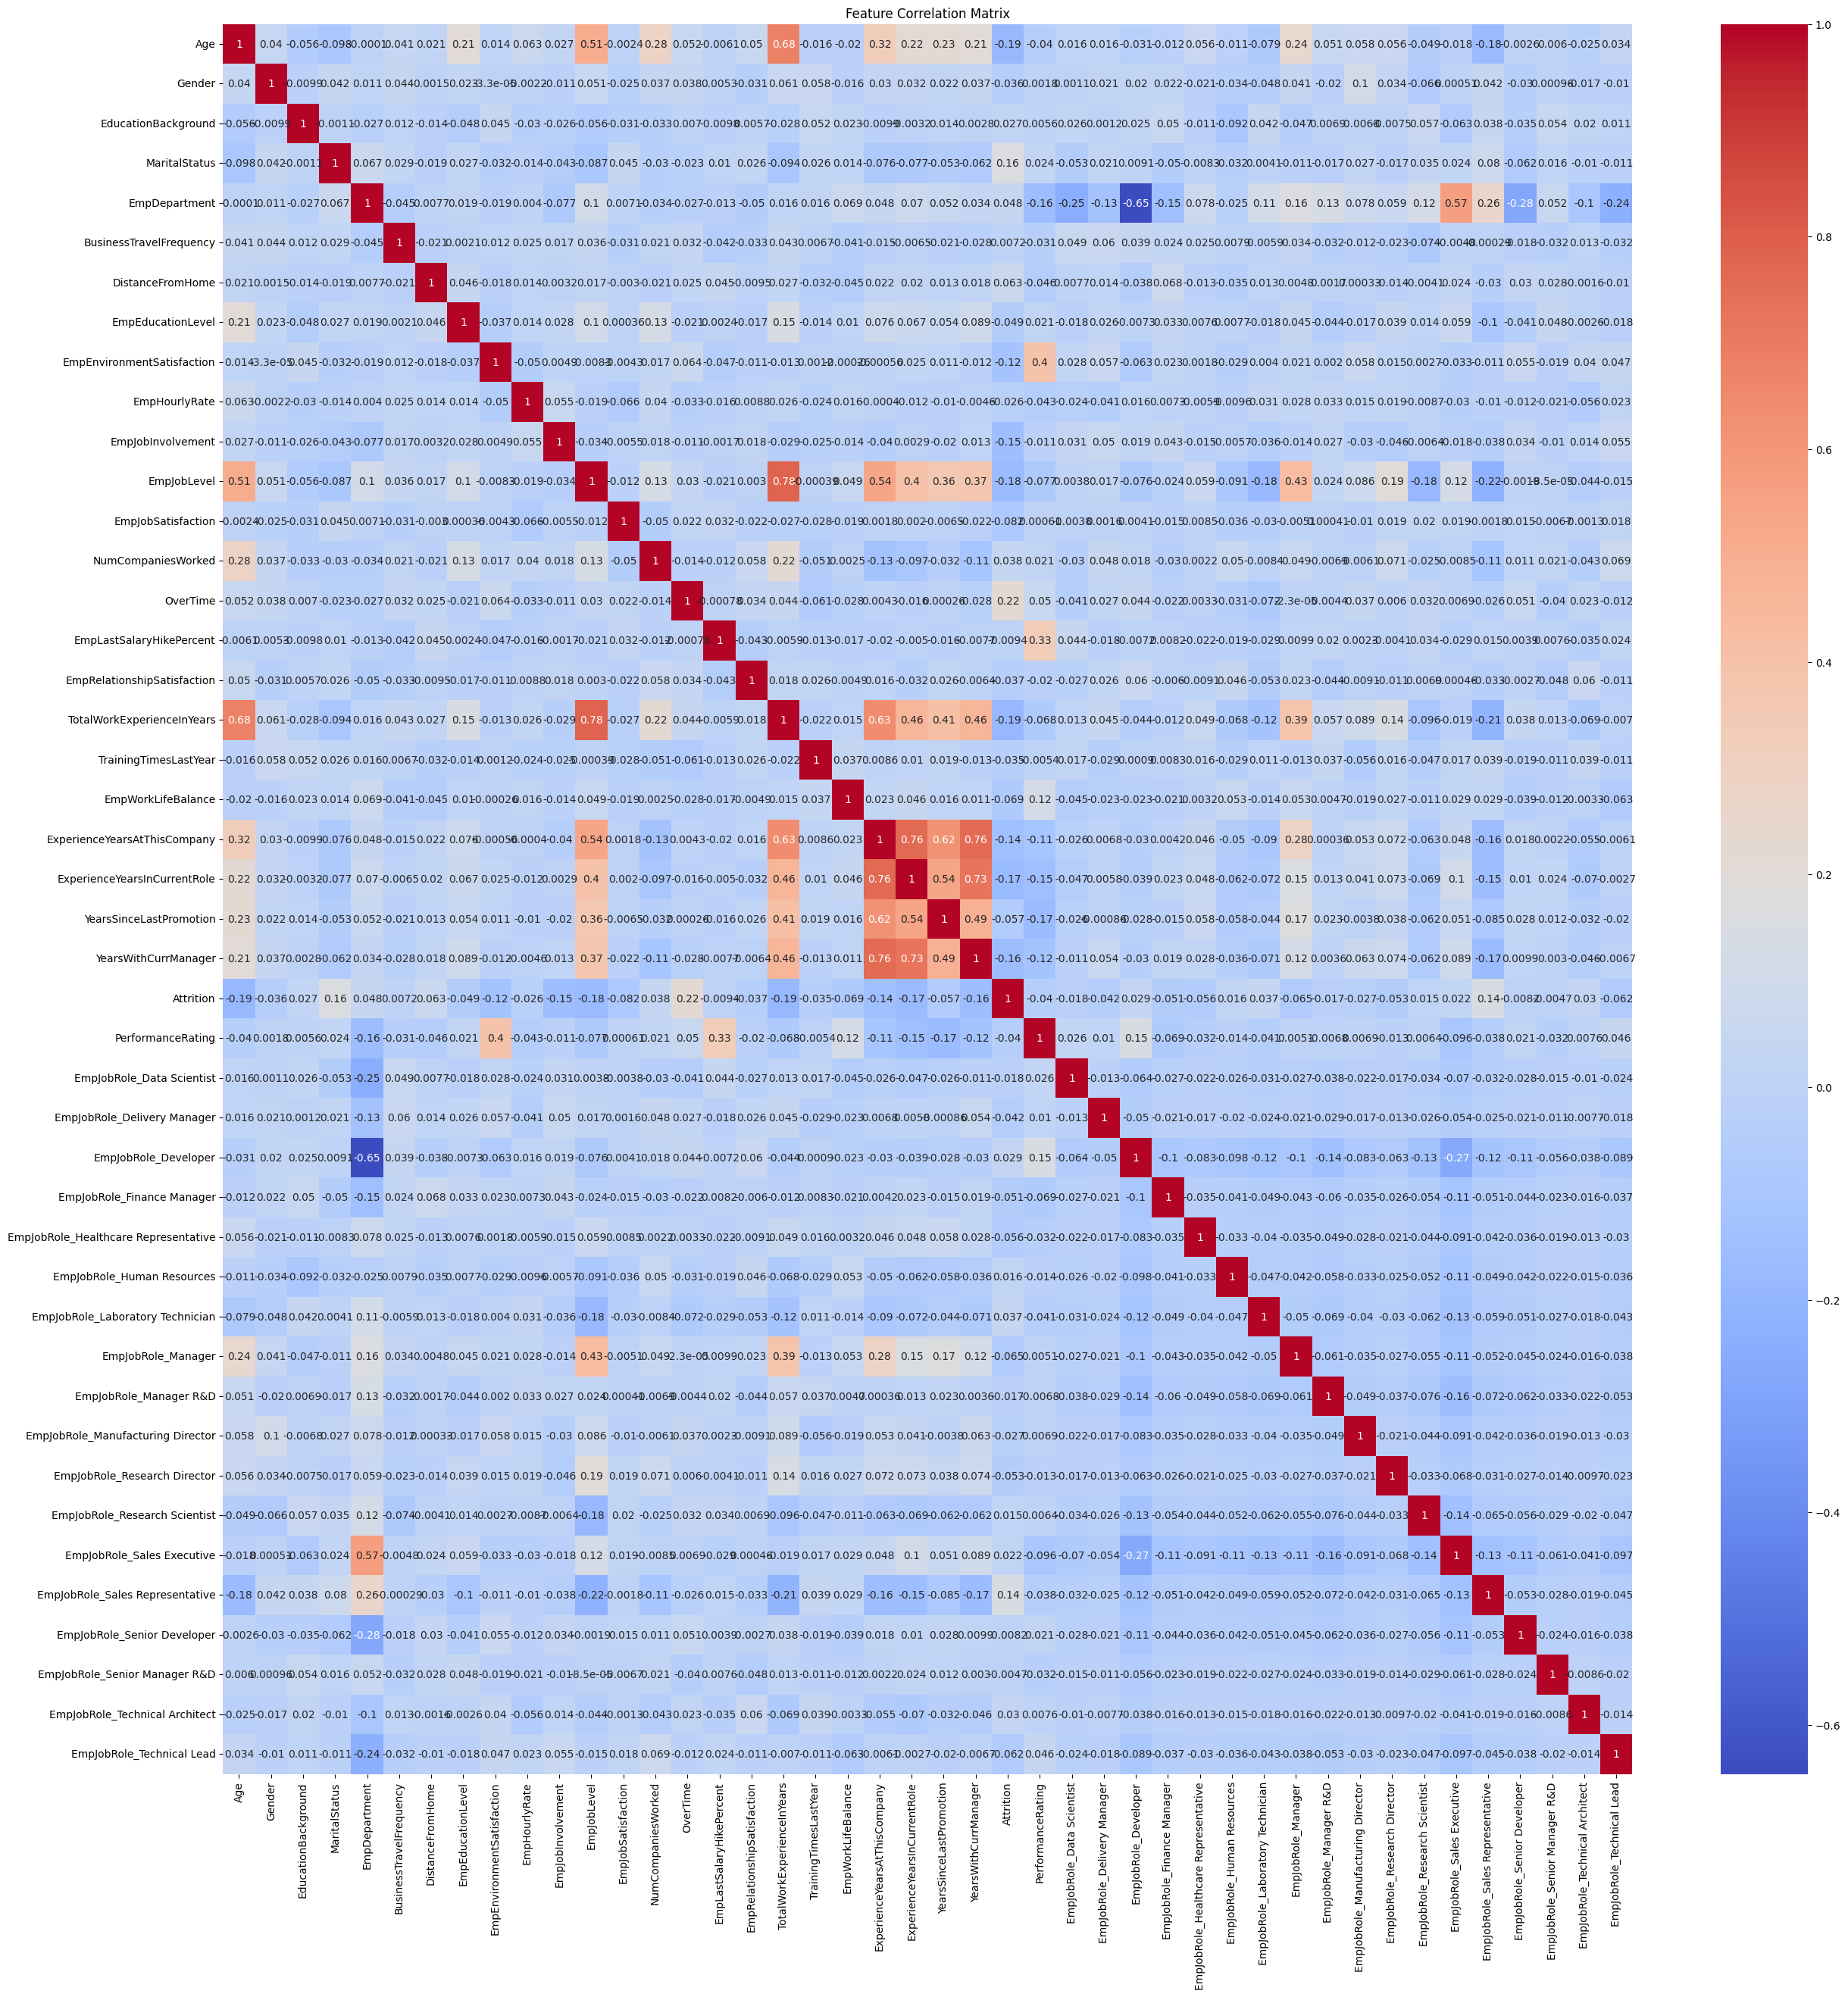

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation heatmap
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [28]:
import pandas as pd

# Compute correlation matrix
correlation_matrix = data.corr()

# Get correlation of all features with the target column 'PerformanceRating'
target_corr = correlation_matrix["PerformanceRating"].sort_values(ascending=False)

# Display the top positively and negatively correlated features
print("🔹 Features with Highest Correlation to PerformanceRating:\n", target_corr)


🔹 Features with Highest Correlation to PerformanceRating:
 PerformanceRating                       1.000000
EmpEnvironmentSatisfaction              0.395561
EmpLastSalaryHikePercent                0.333722
EmpJobRole_Developer                    0.150348
EmpWorkLifeBalance                      0.124429
OverTime                                0.050206
EmpJobRole_Technical Lead               0.045541
EmpJobRole_Data Scientist               0.025520
MaritalStatus                           0.024172
EmpJobRole_Senior Developer             0.021202
NumCompaniesWorked                      0.020980
EmpEducationLevel                       0.020529
EmpJobRole_Delivery Manager             0.010012
EmpJobRole_Technical Architect          0.007631
EmpJobRole_Manufacturing Director       0.006927
EmpJobRole_Research Scientist           0.006415
EducationBackground                     0.005607
EmpJobRole_Manager                      0.005058
Gender                                  0.001780
EmpJobSati

In [ ]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



##############################
# STEP 0: Outlier Detection which was already done
##############################

# For multivariate outlier detection, I use Mahalanobis Distance.
# Here, I select the numerical columns for this calculation.
#below are the columns which are selected for the outlier detection,based on the correlation matrix and market analysis.
numeric_cols = [
    'NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
    'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole','EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent', 
    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmpHourlyRate','EmpJobRole_Developer',
    'EmpWorkLifeBalance', 'OverTime', 'EmpJobRole_Technical Lead'
]

# Calculate the mean vector and covariance matrix (for selected numeric features)
mean_vector = data[numeric_cols].mean().values
cov_matrix = np.cov(data[numeric_cols].values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Function to compute Mahalanobis distance for each row
def mahalanobis_distance(row):
    diff = row[numeric_cols].values - mean_vector
    return mahalanobis(row[numeric_cols].values, mean_vector, inv_cov_matrix)

# Compute distances
data['Mahalanobis_Dist'] = data.apply(mahalanobis_distance, axis=1)

# Determine threshold based on chi-square distribution (degrees of freedom = number of numeric_cols)
# For a significance level (e.g., 0.99), points with distance^2 greater than chi2.ppf(0.99, df)
threshold = np.sqrt(chi2.ppf(0.99, df=len(numeric_cols)))
print("Mahalanobis Distance Threshold:", threshold)

# Flag outliers: rows with Mahalanobis distance greater than threshold
data['Outlier_Flag'] = data['Mahalanobis_Dist'] > threshold

# Optional: Review the number and sample of flagged outliers
print("Total Outliers Flagged:", data['Outlier_Flag'].sum())
print("Sample Outlier Rows:\n", data[data['Outlier_Flag']].head())

# Decision Point: Remove outliers or keep them?
# I have set data_clean = data to keep all rows.
data_with_outliers = data.copy()
# Uncomment the following line if I decide to remove the outliers.
data_without_outliers = data[~data['Outlier_Flag']].copy()


##############################
# STEP 1: Correlation Analysis with the Target
##############################
# I want to know which features are most correlated with our target column: PerformanceRating.

# Calculate correlation on the cleaned dataset (or on data if outliers are kept)
correlation_matrix = data_with_outliers.corr()
target_corr = correlation_matrix["PerformanceRating"].sort_values(ascending=False)
print("\nCorrelation of Features with PerformanceRating:\n", target_corr)

# Optionally, select features with absolute correlation above a threshold (e.g., 0.3)
abs_corr = correlation_matrix["PerformanceRating"].abs()
selected_features = abs_corr[abs_corr > 0.3].index.tolist()
if "PerformanceRating" in selected_features:
    selected_features.remove("PerformanceRating")
print("\nSelected features (|corr| > 0.3):", selected_features)

#note Mahalanobis Distance is not considered in the selected features as it is used for outlier detection. and it is computationally expensive.



Mahalanobis Distance Threshold: 5.398262474229351
Total Outliers Flagged: 82
Sample Outlier Rows:
      Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
11    47       1                    3              0              5   
25    52       0                    2              1              5   
52    47       1                    4              1              1   
72    51       1                    2              1              5   
100   50       0                    1              0              1   

     BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
11                         1                 3                  3   
25                         2                 3                  4   
52                         2                 2                  2   
72                         2                26                  4   
100                        0                 2                  4   

     EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
11  

Mahalanobis_Dist and Outlier_Flag are two columns created during data preprocessing to identify and handle outliers in a multivariate context. 

**Mahalanobis_Dist:**

**Purpose:**
- The Mahalanobis distance measures how far each data point is from the mean of the distribution, considering the correlations between variables.
- Unlike Euclidean distance, it takes into account the covariance among the features, making it a powerful tool for detecting outliers in multivariate data.

**Usage:**
- A high Mahalanobis distance indicates that the data point is unusual compared to the overall distribution.
- This metric is used to determine which points deviate significantly from the norm, thereby flagging potential outliers.

**Outlier_Flag:**

**Purpose:**
- This is a binary indicator (True/False) that marks whether a given observation is considered an outlier based on its Mahalanobis distance.
- Typically, a threshold is set (for example, based on the chi-square distribution corresponding to a certain confidence level). If the Mahalanobis distance for a data point exceeds this threshold, the Outlier_Flag is set to True.

**Usage:**
- It allows I to easily filter or remove outlier data points from my dataset.
- This helps to ensure that my subsequent analysis or machine learning models are not unduly influenced by anomalous data that might distort the overall results.

**In Summary:**

- Mahalanobis_Dist quantifies how "unusual" each observation is considering the correlation among variables.
- Outlier_Flag provides a quick way to identify which observations exceed a predefined threshold of unusualness and are thus considered outliers.
- Using these columns, I have decided whether to remove or further investigate these outliers to improve data quality and model performance.

In [30]:
# Calculate correlation on the cleaned dataset (or on data if outliers are kept)
correlation_matrix = data_without_outliers.corr()
target_corr = correlation_matrix["PerformanceRating"].sort_values(ascending=False)
print("\nCorrelation of Features with PerformanceRating:\n", target_corr)

# Optionally, select features with absolute correlation above a threshold (e.g., 0.3)
abs_corr = correlation_matrix["PerformanceRating"].abs()
selected_features = abs_corr[abs_corr > 0.3].index.tolist()
if "PerformanceRating" in selected_features:
    selected_features.remove("PerformanceRating")
print("\nSelected features (|corr| > 0.3):", selected_features)



Correlation of Features with PerformanceRating:
 PerformanceRating                       1.000000
EmpEnvironmentSatisfaction              0.395173
EmpLastSalaryHikePercent                0.346046
EmpJobRole_Developer                    0.158130
EmpWorkLifeBalance                      0.141066
OverTime                                0.051684
EmpJobRole_Data Scientist               0.027688
NumCompaniesWorked                      0.025179
EmpJobRole_Senior Developer             0.023805
EmpEducationLevel                       0.023763
MaritalStatus                           0.020791
EducationBackground                     0.014027
EmpJobRole_Delivery Manager             0.010854
EmpJobRole_Technical Architect          0.008643
EmpJobRole_Manufacturing Director       0.008325
Mahalanobis_Dist                        0.006065
Gender                                  0.003404
EmpJobRole_Research Scientist           0.001941
EmpJobRole_Manager                      0.001348
EmpJobSatisfaction 

In [31]:
for column in data_without_outliers.columns:
    unique_values = data_without_outliers[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 33 25 45 23 52
 26 54 37 24 49 55 43 22 31 58 20 21 48 19 18 59 46 51 57]
Unique values in column 'Gender': [0 1]
Unique values in column 'EducationBackground': [2 1 0 3 4 5]
Unique values in column 'MaritalStatus': [2 1 0]
Unique values in column 'EmpDepartment': [5 3 1 0 4 2]
Unique values in column 'BusinessTravelFrequency': [2 1 0]
Unique values in column 'DistanceFromHome': [10 14  5 16  8  1 24 27 19  3  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
Unique values in column 'EmpEducationLevel': [3 4 2 5 1]
Unique values in column 'EmpEnvironmentSatisfaction': [4 2 1 3]
Unique values in column 'EmpHourlyRate': [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36  69
  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78  74  91
  33  62  87  68  34  70 100  92  39  97  47  90  85  30  

### Outlier Analysis

Performed outlier detection using Mahalanobis Distance and Outlier_Flag column. Identified several outliers in the dataset. After careful consideration, the decision was made to keep the outliers in the dataset due to their potential significance and impact on the analysis.

In [32]:
data_clean=data_without_outliers

In [33]:
#save the data
data_clean.to_csv("E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\Data\processed", index=False)
